In [6]:
from sympy.physics.quantum import Dagger
from sympy import Symbol
from sympy import sin, cos, exp, sqrt, pi
from sympy import Matrix, print_latex
from numpy import zeros
import math
import numpy as np 

theta = Symbol('theta',real=True, positive=True)
phi = Symbol('phi',real=True, positive=True)
p = Symbol('p',real=True, positive=True)
gamma = Symbol('gamma',real=True, positive=True)

def state_generalized_amplitude_damping(theta, phi, p, gamma):
    Psi_AB = Matrix([[sqrt(p)*cos(theta/2),
                sqrt(p*gamma)*exp(1j*phi)*sin(theta/2),
                sqrt((1-p)*(1-gamma))*cos(theta/2),
                0,
                sqrt(p*(1-gamma))*exp(1j*phi)*sin(theta/2),
                0,
                sqrt(1-p)*exp(1j*phi)*sin(theta/2),
                sqrt(1-p)*gamma*cos(theta/2),]])
    target_op = Dagger(Psi_AB)*Psi_AB
    return target_op
#target_op = state_generalized_amplitude_damping(theta, phi, p, gamma)


def ptraceA(da, db, rho):
    rhoB = zeros((db,db),dtype=complex)
    for j in range(0, db):
        for k in range(0, db):
            for l in range(0, da):
                rhoB[j,k] += rho[l*db+j,l*db+k]
    return rhoB

def ptraceB(da, db, rho):
    rhoA = zeros(da,da)
    for j in range(0, da):
        for k in range(0, da):
            for l in range(0, db):
                rhoA[j,k] += rho[j*db+l,k*db+l]
    return rhoA

def coh_l1(rho):  # normalized to [0,1]
    d = rho.shape[0]
    coh = 0.0
    for j in range(0, d-1):
        for k in range(j+1, d):
            coh += math.sqrt((rho[j][k].real)**2.0 + (rho[j][k].imag)**2.0)
    return 2.0*coh/(d-1)


def pTraceL_num(dl, dr, rhoLR):
    # Returns the left partial trace over the 'left' subsystem of rhoLR
    rhoR = np.zeros((dr, dr), dtype=complex)
    for j in range(0, dr):
        for k in range(j, dr):
            for l in range(0, dl):
                rhoR[j,k] += rhoLR[l*dr+j,l*dr+k]
            if j != k:
                rhoR[k,j] = np.conj(rhoR[j,k])
    return rhoR

def pTraceR_num(dl, dr, rhoLR):
    # Returns the right partial trace over the 'right' subsystem of rhoLR
    rhoL = np.zeros((dl, dl), dtype=complex)
    for j in range(0, dl):
        for k in range(j, dl):
            for l in range(0, dr):
                rhoL[j,k] += rhoLR[j*dr+l,k*dr+l]
        if j != k:
            rhoL[k,j] = np.conj(rhoL[j,k])
    return rhoL





In [7]:
target_op = state_generalized_amplitude_damping(theta, phi, p, gamma)
#target_op = state_generalized_amplitude_damping(pi/2, 0, 0.5, 0.5)
#rho_B = pTraceR_num(2, 2, target_op)
#rho_B
#target_op
print_latex(target_op)

\left[\begin{matrix}p \cos^{2}{\left(\frac{\theta}{2} \right)} & \sqrt{\gamma} p e^{1.0 i \phi} \sin{\left(\frac{\theta}{2} \right)} \cos{\left(\frac{\theta}{2} \right)} & \sqrt{p} \sqrt{\left(1 - \gamma\right) \left(1 - p\right)} \cos^{2}{\left(\frac{\theta}{2} \right)} & 0 & p \sqrt{1 - \gamma} e^{1.0 i \phi} \sin{\left(\frac{\theta}{2} \right)} \cos{\left(\frac{\theta}{2} \right)} & 0 & \sqrt{p} \sqrt{1 - p} e^{1.0 i \phi} \sin{\left(\frac{\theta}{2} \right)} \cos{\left(\frac{\theta}{2} \right)} & \gamma \sqrt{p} \sqrt{1 - p} \cos^{2}{\left(\frac{\theta}{2} \right)}\\\sqrt{\gamma} p e^{- 1.0 i \phi} \sin{\left(\frac{\theta}{2} \right)} \cos{\left(\frac{\theta}{2} \right)} & \gamma p \sin^{2}{\left(\frac{\theta}{2} \right)} & \sqrt{\gamma} \sqrt{p} \sqrt{\left(1 - \gamma\right) \left(1 - p\right)} e^{- 1.0 i \phi} \sin{\left(\frac{\theta}{2} \right)} \cos{\left(\frac{\theta}{2} \right)} & 0 & \sqrt{\gamma} p \sqrt{1 - \gamma} \sin^{2}{\left(\frac{\theta}{2} \right)} & 0 & \sqrt{\gamm

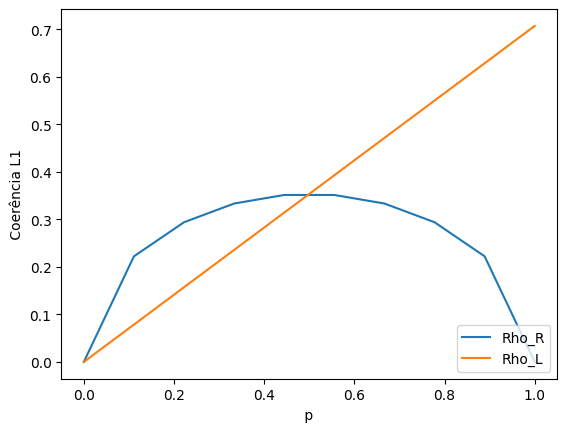

In [4]:
from numpy import linspace
import matplotlib.pyplot as plt

# theoric plot
#def plot_test(rho):
 
list_gamma = linspace(0,1,10)
list_gamma = [0]
list_p = linspace(0,1,10)
coerencias_R = []
coerencias_L = []
#for g in list_gamma:
for p in list_p:
    rho = state_generalized_amplitude_damping(pi/2, 0, p, 0.5)
    
    rhoA_R = pTraceR_num(2,2,rho)
    rhoA_L = pTraceL_num(2,2,rho)
    cA_R = coh_l1(rhoA_R)
    cA_L = coh_l1(rhoA_L)
    coerencias_R.append(cA_R)
    coerencias_L.append(cA_L)
plt.plot(list_p,coerencias_R,label='Rho_R')
plt.plot(list_p,coerencias_L,label='Rho_L')
plt.xlabel(' p ')
plt.ylabel(' Coerência L1 ')
plt.legend(loc=4)
plt.show()

    

In [17]:
from sympy.physics.quantum import TensorProduct,Dagger
from sympy import Symbol
from sympy import sin, cos, exp, sqrt
from sympy.matrices import Matrix

theta = Symbol('theta')
phi = Symbol('phi')
p = Symbol('p')

def general_state_matrix():
    return Matrix([[cos(theta/2)**2, exp(1j*phi)*cos(theta/2)*sin(theta/2)],[exp(-1j*phi)*cos(theta/2)*sin(theta/2),sin(theta/2)**2]])
matriz_estado_geral = general_state_matrix()
#matriz_estado_geral

def Kad(j, a):
    if j == 0:
        return Matrix([[0,sqrt(a)],[0,0]])
    elif j == 1:
        return Matrix([[1,0],[0,sqrt(1-a)]])

k0 = Kad(2,p)
k0

In [9]:
import sympy as sym
from sympy.physics.quantum import TensorProduct, Dagger
from sympy.matrices import Matrix
theta = sym.Symbol('theta')
phi = sym.Symbol('phi')
p = sym.Symbol('p')
gamma = sym.Symbol('gamma')
Psi_AB = sym.Matrix([[
           sym.sqrt(p)*sym.cos(theta/2)],[
           sym.sqrt(p*gamma)*sym.exp(1j*phi)*sym.sin(theta/2)],[
           sym.sqrt((1-p)*(1-gamma))*sym.cos(theta/2)],[
           0],[
           sym.sqrt(p*(1-gamma))*sym.exp(1j*phi)*sym.sin(theta/2)],[
           0],[
           sym.sqrt(1-p)*sym.exp(1j*phi)*sym.sin(theta/2)],[
           sym.sqrt(1-p)*gamma*sym.cos(theta/2)
           ]]) 
# Psi_AB = sym.Array([[sym.sqrt(p)*sym.cos(theta/2),
#            sym.sqrt(p*gamma)*sym.exp(1j*phi)*sym.sin(theta/2),
#            sym.sqrt((1-p)*(1-gamma))*sym.cos(theta/2),
#            0,
#            sym.sqrt(p*(1-gamma))*sym.exp(1j*phi)*sym.sin(theta/2),
#            0,
#            sym.sqrt(1-p)*sym.exp(1j*phi)*sym.sin(theta/2),
#            sym.sqrt(1-p)*gamma*sym.cos(theta/2)
#            ]]) 
Psi_AB.shape
result = Psi_AB*Dagger(Psi_AB)



Matrix([
[                           sqrt(p)*cos(theta/2)*cos(conjugate(theta)/2)*conjugate(sqrt(p)),                            sqrt(p)*exp(-1.0*I*conjugate(phi))*sin(conjugate(theta)/2)*cos(theta/2)*conjugate(sqrt(gamma*p)),                            sqrt(p)*cos(theta/2)*cos(conjugate(theta)/2)*conjugate(sqrt((1 - gamma)*(1 - p))), 0,                            sqrt(p)*exp(-1.0*I*conjugate(phi))*sin(conjugate(theta)/2)*cos(theta/2)*conjugate(sqrt(p*(1 - gamma))), 0,                            sqrt(p)*exp(-1.0*I*conjugate(phi))*sin(conjugate(theta)/2)*cos(theta/2)*conjugate(sqrt(1 - p)),                            sqrt(p)*cos(theta/2)*cos(conjugate(theta)/2)*conjugate(gamma)*conjugate(sqrt(1 - p))],
[      sqrt(gamma*p)*exp(1.0*I*phi)*sin(theta/2)*cos(conjugate(theta)/2)*conjugate(sqrt(p)),       sqrt(gamma*p)*exp(1.0*I*phi)*exp(-1.0*I*conjugate(phi))*sin(theta/2)*sin(conjugate(theta)/2)*conjugate(sqrt(gamma*p)),       sqrt(gamma*p)*exp(1.0*I*phi)*sin(theta/2)*cos(conjugate(theta)/2)

In [ ]:
from sympy.physics.quantum import TensorProduct
from sympy import conjugate

rho_AB = TensorProduct(conjugate(Psi_AB),Psi_AB)
rho_AB

Matrix([
[                                       cos(conjugate(theta)/2)*conjugate(sqrt(p))],
[      exp(-1.0*I*conjugate(phi))*sin(conjugate(theta)/2)*conjugate(sqrt(gamma*p))],
[                     cos(conjugate(theta)/2)*conjugate(sqrt((1 - gamma)*(1 - p)))],
[                                                                                0],
[exp(-1.0*I*conjugate(phi))*sin(conjugate(theta)/2)*conjugate(sqrt(p*(1 - gamma)))],
[                                                                                0],
[        exp(-1.0*I*conjugate(phi))*sin(conjugate(theta)/2)*conjugate(sqrt(1 - p))],
[                  cos(conjugate(theta)/2)*conjugate(gamma)*conjugate(sqrt(1 - p))]])xMatrix([
[                           sqrt(p)*cos(theta/2)],
[      sqrt(gamma*p)*exp(1.0*I*phi)*sin(theta/2)],
[         sqrt((1 - gamma)*(1 - p))*cos(theta/2)],
[                                              0],
[sqrt(p*(1 - gamma))*exp(1.0*I*phi)*sin(theta/2)],
[                                             

In [ ]:
from sympy.vector import CoordSys3D
N = CoordSys3D('N')
v1 = 2*N.i+3*N.j-N.k
v2 = N.i-4*N.j+N.k
v1.dot(v2)
v3 = v1.cross(v2)
v3

(-1)*N.i + (-3)*N.j + (-11)*N.k

In [ ]:
target_op = state_generalized_amplitude_damping(np.pi/2, 0, p,1)
alpha = eval(input("How many rows? "))
beta = eval(input("How many columns? "))

def make_matrix(alpha,beta):
    matrix_thing = SHIT.random.randint(0,50,(alpha,beta))
    return(matrix_thing)

matrix_sympy = Matrix(make_matrix(alpha, beta))